In [68]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [72]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [73]:
dataset.columns
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [74]:
dependent=dataset[["charges"]]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [76]:
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,False,False
196,39,32.800,0,False,False
438,52,46.750,5,False,False
183,44,26.410,0,False,False
1298,33,27.455,2,True,False
...,...,...,...,...,...
763,27,26.030,0,True,False
835,42,35.970,2,True,False
1216,40,25.080,0,True,False
559,19,35.530,0,True,False


In [77]:
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor(n_estimators=10, criterion='friedman_mse', max_features='log2')
regressorRF.fit(X_train, y_train)
y_pred=regressorRF.predict(X_test)
y_pred
from sklearn.metrics import r2_score
r_scoreRF=r2_score(y_test,y_pred)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [78]:
r_scoreRF

0.8498710851442232

In [79]:
from sklearn.linear_model import LinearRegression
regressorMLR=LinearRegression()
regressorMLR.fit(X_train,y_train)
#LinearRegression()

LinearRegression()

In [80]:
weight=regressorMLR.coef_
weight

array([[  257.8006705 ,   321.06004271,   469.58113407,   -41.74825718,
        23418.6671912 ]])

In [81]:
bais=regressorMLR.intercept_
bais

array([-12057.244846])

In [82]:
y_pred=regressorMLR.predict(X_test)

In [83]:
from sklearn.metrics import r2_score
r_scoreMLR=r2_score(y_test,y_pred)

In [84]:
r_scoreMLR

0.7894790349867009

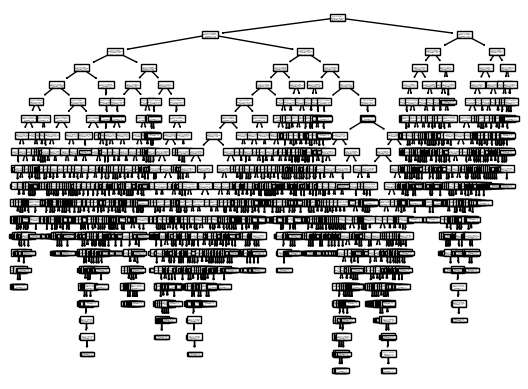

In [85]:
from sklearn.tree import DecisionTreeRegressor
regressorDT=DecisionTreeRegressor(criterion='poisson', splitter='random',max_features='sqrt')
regressorDT=regressorDT.fit(X_train,y_train)
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressorDT)
plt.show()
y_pred=regressorDT.predict(X_test)
from sklearn.metrics import r2_score
r_scoreDT=r2_score(y_test,y_pred)

In [86]:
r_scoreDT

0.7032522540095842

In [87]:
max_val = max(r_scoreRF, r_scoreMLR, r_scoreDT)
print(max_val)

0.8498710851442232


In [88]:
filename =""
if (max_val == r_scoreRF):
    filename = "Assignment_Final_RF_niyas.sav"
elif (max_val == r_scoreMLR):
    filename  = "Assignment_Final_MLR_niyas.sav"
elif (max_val == r_scoreDT):
    filename = "Assignment_Final_DT_niyas.sav"

In [89]:
print(filename)

Assignment_Final_RF_niyas.sav


In [90]:
#DEPLOYMENT
import pickle
pickle.dump(regressor,open(filename,'wb'))

In [91]:
#LOAD MODEL
loaded_model=pickle.load(open(filename,'rb'))
#predict model
result=loaded_model.predict([[1234,345,4565,1,0]])

C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [92]:
result

array([36580.28216])